In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
projected_A = pd.Series([3289, 3566, 2358, 2951, 2152, 973, 2453, 2314, 2347, 2765])
projected_B = pd.Series([2100, 2409, 4090, 1874, 3893, 3973, 3615, 3541, 2900, 2602])

<Axes: >

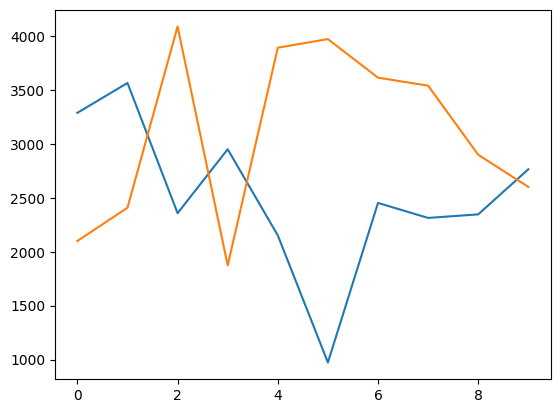

In [72]:
pd.Series(projected_A).plot()
pd.Series(projected_B).plot()

In [120]:
from sklearn.linear_model import LinearRegression

projected_A = np.array([3289, 3566, 2358, 2951, 2152, 973, 2453, 2314, 2347, 2765])
projected_B = np.array([2100, 2409, 4090, 1874, 3893, 3973, 3615, 3541, 2900, 2602])
x = np.array(list(zip(projected_A[:5], projected_B[:5])))
y = np.array([1686, 1998, 1858, 1870, 1894])

model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.13055409838096044

In [84]:
x = np.array(list(zip(projected_A.to_numpy()[:5], projected_B.to_numpy()[:5])))
y = np.array([1686, 1998, 1858, 1870, 1894])

In [89]:
x2 = np.array(list(zip(projected_A.to_numpy()[5:], projected_B.to_numpy()[5:])))


In [85]:
x

array([[3289, 2100],
       [3566, 2409],
       [2358, 4090],
       [2951, 1874],
       [2152, 3893]])

In [80]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 286.4 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 654.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 1.2 MB/s eta 0:00:0000:0100:01m


In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=1, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x)

In [115]:
poly_features

array([[3289., 2100.],
       [3566., 2409.],
       [2358., 4090.],
       [2951., 1874.],
       [2152., 3893.]])

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

LinearRegression()

In [117]:
model.score(poly_features,y)

0.13055409838096044

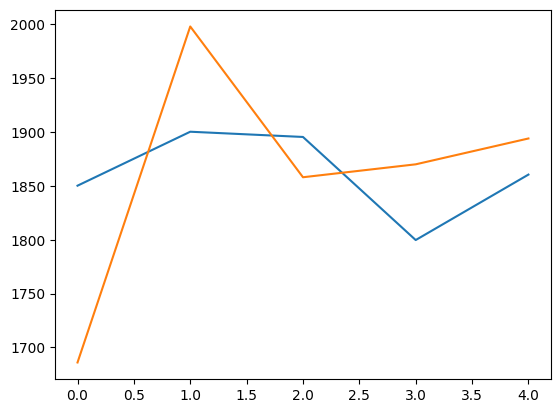

In [118]:
plt.plot(model.predict(poly_features))
plt.plot(actual_usage)

In [66]:
m_A = [35,38] # loadsize
k_A = [5,7] # batchlife
mu = [0.04,0.09] # reclaim efficiency
m_B = [45,52]
k_B = [7,8]

In [59]:
N_A = projected_A / (m_A*k_A)
N_B = projected_B / (m_B*k_B)

In [127]:
predicted_usage_worst = 80 + (1-mu[1])*80*(projected_A/(m_A[0]*k_A[0])-1) +  80 + (1-mu[1])*80*(projected_B/(m_B[0]*k_B[0])-1)
predicted_usage_best = 80 + (1-mu[0])*80*(projected_A/(m_A[1]*k_A[1])-1) +  80 + (1-mu[0])*80*(projected_B/(m_B[1]*k_B[1])-1)

In [126]:
actual_usage = pd.Series([1686, 1998, 1858, 1870, 1894])
1 - (actual_usage - 160) / (80*((projected_A[:5]/(36.5*6)-1) + projected_B[:5]/(47.5*7.5)-1))

0   -0.008565
1   -0.091697
2   -0.048261
3   -0.277245
4   -0.155741
dtype: float64

In [139]:
N_A = projected_A / (sum(m_A)/2*sum(k_A)/2)
N_B = projected_B / ((sum(m_B)/2)*sum(k_B)/2)
predicted_usage = 80 + (1-0.065)*80*(N_A-1) +  80 + (1-0.065)*80*(N_B-1)

In [148]:
predicted_usage

array([1565.60126159, 1723.75275055, 1656.83099374, 1403.68283576,
       1545.96093584, 1159.72138399, 1591.60150638, 1528.90866262,
       1408.3673869 , 1489.8568865 ])

In [149]:
predicted_usage_worst[5:]

array([1337.37244444, 1870.31466667, 1795.38844444, 1660.97422222,
       1765.99111111])

In [154]:
actual_usage = pd.Series([1686, 1998, 1858, 1870, 1894])

([<matplotlib.axis.XTick at 0x7f5b91bb2aa0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

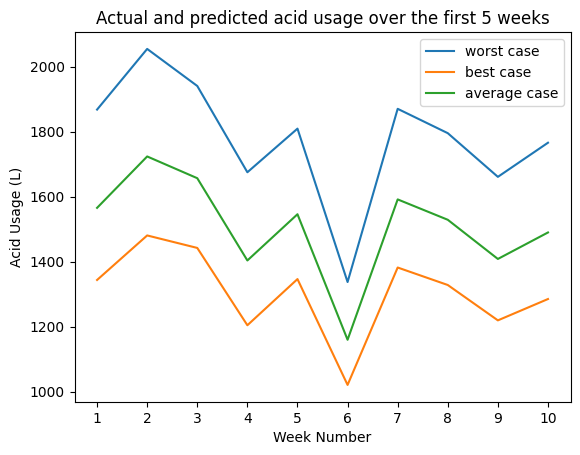

In [176]:
import seaborn as sb
sb.lineplot(y=predicted_usage_worst[:10],x=range(1,11),label='worst case')
sb.lineplot(y=predicted_usage_best[:10], x=range(1,11),label = 'best case')
# sb.lineplot(y=actual_usage, x=range(1,6), label='actual')
sb.lineplot(y=predicted_usage[:10],x=range(1,11),label='average case')
plt.xlabel('Week Number')
plt.ylabel('Acid Usage (L)')
plt.title('Actual and predicted acid usage over the first 5 weeks')
plt.xticks(range(1,11))

In [ ]:
from sklearn.linear_model import LinearRegression
 
x = np.array(list(zip(projected_A[:5], projected_B[:5])))
y = np.array([1686, 1998, 1858, 1870, 1894])
 
model = LinearRegression()
model.fit(x, y)
model.score(x, y) # 0.13055409838096044

In [180]:
pd.Series(predicted_usage_worst-predicted_usage_best).describe()

count     10.000000
mean     472.456566
std       66.112606
min      316.569206
25%      463.973683
50%      475.818519
75%      495.790996
max      573.882250
dtype: float64

In [147]:
(actual_usage - predicted_usage[:5]).mean()

282.03424450407175

In [132]:
predicted_usage_worst[:5] - actual_usage.to_numpy()

array([ 181.95733333,   56.60266667,   82.57244444, -194.88177778,
        -84.65244444])

In [40]:
(predicted_usage - actual_usage) / actual_usage

0   -0.142535
1   -0.201973
2   -0.152356
3   -0.307201
4   -0.223285
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
dtype: float64

In [45]:
actual_mu = 1 - (actual_usage - 80) / (80*(N_A+N_B-1))

<Axes: >

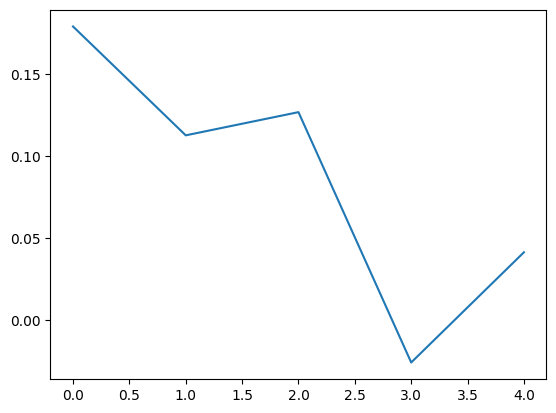

In [47]:
actual_mu.plot()

In [48]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 836.4 kB/s eta 0:00:00a 0:00:01
